Ejercicio 1 (35 puntos)

 El conjunto de datos de criminalidad Download datos de criminalidadde Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

VR = crímenes violentos por cada 100000 habitantes

MR = asesinatos por cada 100000 habitantes

M = porcentaje de áreas metropolitanas

W = porcentaje de gente blanca

H = porcentaje de personas con preparatoria terminada

P = porcentaje con ingresos por debajo del nivel de pobreza

S = porcentaje de familias con solo un miembro adulto como tutor

Para este conjunto de datos:

0 - Variable dependiente VR, variables independientes M, W, H y P

1. Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar los datos
data = pd.read_csv('/content/sample_data/crime_data.csv')

# Variables asignadas para el último dígito de matrícula = 0
X = data[['M', 'W', 'H', 'P']].values  # Variables independientes
y = data['VR'].values  # Variable dependiente

# Configurar el modelo de perceptrón multicapa
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)

# 5-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp_cv = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=10000)
    mlp_cv.fit(X_train, y_train)

    # Fase de prueba
    y_pred = mlp_cv.predict(X_test)

    # Calcular métricas en cada fold
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Promediar las métricas de cada fold
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")
print(f"Mean R2: {np.mean(r2_scores):.4f}")


Mean MSE: 71418.9595
Mean MAE: 181.3836
Mean R2: 0.3842


2. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

  A. ¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?

  Tomando en cuenta mis resultados de la evaluación del modelo perceptrón multicapa puedo decir que no considero que sea efectivo ya que el valor del error cuadrado medio el cuál nos indica que en promedio a la hora de predecir los valores se equivoca por 71000 lo cuál es demasiado y nos indica que el modelo no es adecuado. Además el valor de R2 que nos indica cuál es el porcentaje de variabilidad que el modelo puede explicar y en este caso al ser un valor de 0.38 nos indica que el modelo solo puede explicar 38% de la variabilidad que hay en los datos y esto es un valor muy bajo.

  B. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?
  
  Al no haber probado un modelo lineal con este dataset no podría decir con certeza si este modelo es mejor que el de perceptrón multicapa, pero, viendo los resultados tan malos del modelo de perceptrón para las variables que me tocaron y el dataset podría decir que existe una alta posibilidad de que un modelo lineal sea mejor para estos datos.

Ejercicio 2 (35 puntos)

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpyLinks to an external site.. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

1. Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from numpy import loadtxt

# Cargar datos
data = loadtxt('/content/sample_data/M_2.txt')

# Separar características y etiquetas
X = data[:, 2:]  # Ignoramos la segunda columna
y = data[:, 0]   # La primera columna es la clase

# Definir el modelo con 5 capas de 20 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=10000)

# Validación cruzada
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True)

accuracies = []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo
    mlp.fit(X_train, y_train)

    # Predecir
    y_pred = mlp.predict(X_test)

    # Calcular precisión
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Imprimir reporte de clasificación
    print(classification_report(y_test, y_pred))

# Mostrar la media de precisión en la validación cruzada
print(f'Mean Accuracy: {np.mean(accuracies):.4f}')


              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95        18
         2.0       1.00      0.72      0.84        18
         3.0       1.00      0.83      0.91        18
         4.0       0.94      0.89      0.91        18
         5.0       0.64      0.78      0.70        18
         6.0       0.79      0.83      0.81        18
         7.0       0.85      0.94      0.89        18

    accuracy                           0.86       126
   macro avg       0.87      0.86      0.86       126
weighted avg       0.87      0.86      0.86       126

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94        18
         2.0       0.81      0.72      0.76        18
         3.0       0.94      0.89      0.91        18
         4.0       1.00      0.94      0.97        18
         5.0       0.71      0.83      0.77        18
         6.0       0.80      0.89      0.84        18
         7.0       1.00 

2. Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red.

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from numpy import loadtxt

# Cargar datos
data = loadtxt('C:\\Users\\PC\\Documents\\Python\\Actividad3_Redes_neuronales\\M_2.txt')

# Separar características y etiquetas
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # La primera columna es la clase

#------------------------------------------------------------------------------------------------------------------
# Evaluar modelo (2 capas de 100 neurones)
#------------------------------------------------------------------------------------------------------------------

y_pred = cross_val_predict(MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000), X, y)
print(classification_report(y, y_pred))

# Definir el rango de capas y neuronas a probar
num_layers = np.arange(1, 20, 5)
num_neurons = np.arange(10, 110, 20)

# Generar combinaciones de capas y neuronas
layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l * [n])

# Definir el modelo base
mlp = MLPClassifier(max_iter=10000)

# Configurar la búsqueda de hiperparámetros
clf = GridSearchCV(mlp, {'hidden_layer_sizes': layers}, cv=5)

# Ajustar el modelo para encontrar el mejor número de capas y neuronas
clf.fit(X, y)

# Imprimir los mejores parámetros encontrados
print("Mejor configuración encontrada:")
print(clf.best_estimator_)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
y_pred = cross_val_predict(clf, X, y, cv=5)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         1.0       0.90      0.91      0.91        90
         2.0       0.68      0.67      0.67        90
         3.0       0.93      0.93      0.93        90
         4.0       0.91      0.89      0.90        90
         5.0       0.81      0.69      0.74        90
         6.0       0.72      0.76      0.74        90
         7.0       0.86      0.98      0.92        90

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630

Mejor configuración encontrada:
MLPClassifier(hidden_layer_sizes=[np.int64(90)], max_iter=10000)
Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93        90
         2.0       0.73      0.71      0.72        90
         3.0       0.97      0.93      0.95        90
         4.0       0.88      0.90      0.89        90
         

3. Prepara el modelo perceptrón multicapa:

  A. Opten los hiperparámetros óptimos de capas y neuronas de la red.
  
  B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt

# Cargar los datos
data = loadtxt('M_2.txt')

# Separar las características y las etiquetas
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # La primera columna es la clase

# Utilizar la mejor configuración encontrada en mi paso anterior
best_model = MLPClassifier(hidden_layer_sizes=[90], max_iter=10000)

# Ajustar el modelo con todos los datos
best_model.fit(X, y)

# El modelo ha sido entrenado con todos los datos usando los mejores hiperparámetros
print("Modelo ajustado con la configuración óptima y todos los datos.")


Modelo ajustado con la configuración óptima y todos los datos.


4. Contesta lo siguientes:

    A. ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.
    Definitivamente se observa una mejora entre el primer modelo que probé con 2 capas de 100 neuronas contra el modelo ya con los hiperparámetros optimizados, la diferencia promedio final es de 2%, de 83% pasó a 85%, la verdad es que supongo que yo esperaba que fuera un poco más la diferencia pero igual una diferencia de 2 por ciento no creo que sea algo malo.

    B. ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?
    El principal inconveniente es el tiempo de computo, noté que en collab se llegó hasta los 16 minutos de ejecución y en local me tardó 5 minutos. Por lo que la diferencia de hacerlo directo en el que es casi instantáneo y que se tarde 16 minutos si es muy grande.


Ejercicio 3 (30 puntos)

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpyLinks to an external site.. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

Para tu conjunto de datos:

1. Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.

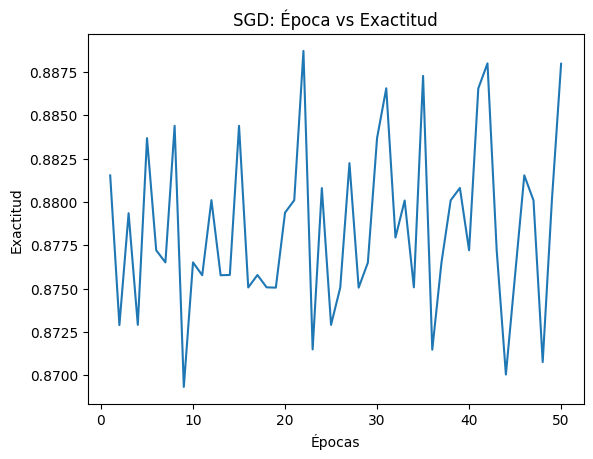

In [3]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from numpy import loadtxt
import matplotlib.pyplot as plt

# Cargar los datos
data = loadtxt('C:\\Users\\PC\\Documents\\Python\\Actividad3_Redes_neuronales\\P1_1.txt')

# Separar las características y las etiquetas
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # La primera columna es la clase (1 = atención, 2 = no atención)

# Perceptrón de una neurona con SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, learning_rate='constant', eta0=0.01)

# Gráfica de Época vs Exactitud
epochs = 50
accuracies = []

for epoch in range(epochs):
    sgd_model.partial_fit(X, y, classes=np.unique(y))  # Entrenar una época
    accuracy = np.mean(cross_val_score(sgd_model, X, y, cv=5))  # Validación cruzada
    accuracies.append(accuracy)

# Gráfica
plt.plot(range(1, epochs + 1), accuracies)
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.title('SGD: Época vs Exactitud')
plt.show()


2. Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.

Descenso de Gradiente por Lote

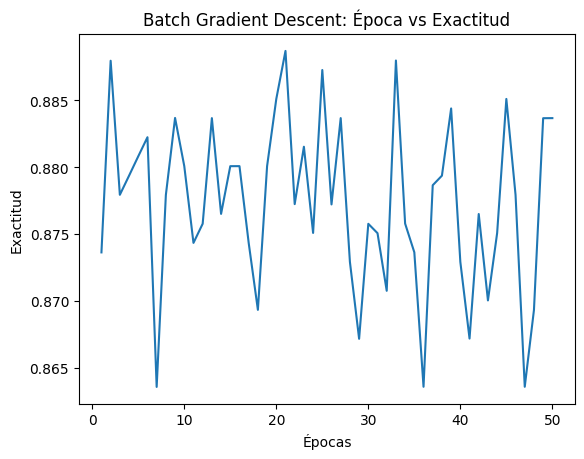

In [4]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from numpy import loadtxt
import matplotlib.pyplot as plt

# Cargar los datos
data = loadtxt('C:\\Users\\PC\\Documents\\Python\\Actividad3_Redes_neuronales\\P1_1.txt')

# Separar las características y las etiquetas
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # La primera columna es la clase (1 = atención, 2 = no atención)
# Perceptrón de una neurona con Gradiente de Lote
batch_model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, learning_rate='constant', eta0=0.01)

# Gráfica de Época vs Exactitud para Gradiente de Lote
accuracies_batch = []

for epoch in range(epochs):
    batch_model.fit(X, y)  # Entrenar una época con todo el conjunto de datos
    accuracy = np.mean(cross_val_score(batch_model, X, y, cv=5))  # Validación cruzada
    accuracies_batch.append(accuracy)

# Gráfica
plt.plot(range(1, epochs + 1), accuracies_batch)
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.title('Batch Gradient Descent: Época vs Exactitud')
plt.show()

Descenso de Gradiente por Mini-Lotes

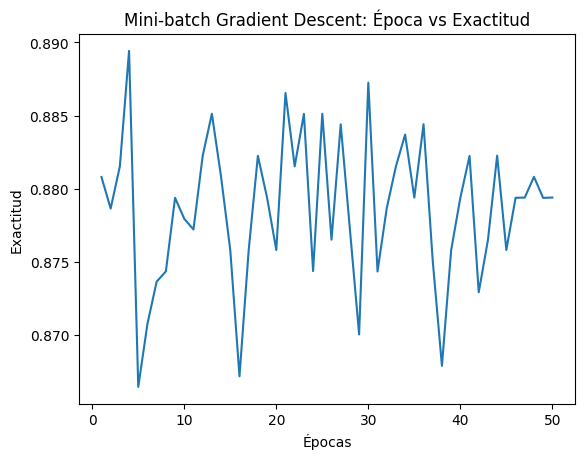

In [5]:
# Perceptrón de una neurona con Mini-lotes
mini_batch_model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, learning_rate='constant', eta0=0.01)

# Definir el tamaño del mini-lote
mini_batch_size = 20
accuracies_mini_batch = []

for epoch in range(epochs):
    for i in range(0, len(X), mini_batch_size):
        mini_X = X[i:i + mini_batch_size]
        mini_y = y[i:i + mini_batch_size]
        mini_batch_model.partial_fit(mini_X, mini_y, classes=np.unique(y))  # Entrenar en mini-lotes
    accuracy = np.mean(cross_val_score(mini_batch_model, X, y, cv=5))  # Validación cruzada
    accuracies_mini_batch.append(accuracy)

# Gráfica
plt.plot(range(1, epochs + 1), accuracies_mini_batch)
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.title('Mini-batch Gradient Descent: Época vs Exactitud')
plt.show()


3. Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Cargar los datos
data = loadtxt('C:\\Users\\PC\\Documents\\Python\\Actividad3_Redes_neuronales\\P1_1.txt')

# Separar las características y las etiquetas
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # La primera columna es la clase (1 = atención, 2 = no atención)

# Perceptrón multicapa
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10000)

# Validación cruzada
y_pred = cross_val_predict(mlp_model, X, y, cv=5)

# Reporte de clasificación
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

         1.0       0.81      0.69      0.74       278
         2.0       0.93      0.96      0.94      1115

    accuracy                           0.91      1393
   macro avg       0.87      0.82      0.84      1393
weighted avg       0.90      0.91      0.90      1393



4. Contesta las siguientes preguntas:

    A. ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?
    
    Juzgando por las gráficas yo podría decir con mucha certeza que no ya que en las 3 gráficas se puede ver como a pesar de que mientras avanzan las épocas la exactitud fluctúa de manera muy errática sin ningún patrón que nos indique que se está mejorando el modelo mientras más épocas pasan. Se puede ver que la exactitud sube pero conforme avanzan más épocas baja drásticamente y este patrón continua por toda la gráfica.